In [4]:
# kaggle client
!pip install --quiet kaggle

from google.colab import files
files.upload()


Saving penguins_size.csv to penguins_size (1).csv


{'penguins_size (1).csv': b'species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex\nAdelie,Torgersen,39.1,18.7,181,3750,MALE\nAdelie,Torgersen,39.5,17.4,186,3800,FEMALE\nAdelie,Torgersen,40.3,18,195,3250,FEMALE\nAdelie,Torgersen,NA,NA,NA,NA,NA\nAdelie,Torgersen,36.7,19.3,193,3450,FEMALE\nAdelie,Torgersen,39.3,20.6,190,3650,MALE\nAdelie,Torgersen,38.9,17.8,181,3625,FEMALE\nAdelie,Torgersen,39.2,19.6,195,4675,MALE\nAdelie,Torgersen,34.1,18.1,193,3475,NA\nAdelie,Torgersen,42,20.2,190,4250,NA\nAdelie,Torgersen,37.8,17.1,186,3300,NA\nAdelie,Torgersen,37.8,17.3,180,3700,NA\nAdelie,Torgersen,41.1,17.6,182,3200,FEMALE\nAdelie,Torgersen,38.6,21.2,191,3800,MALE\nAdelie,Torgersen,34.6,21.1,198,4400,MALE\nAdelie,Torgersen,36.6,17.8,185,3700,FEMALE\nAdelie,Torgersen,38.7,19,195,3450,FEMALE\nAdelie,Torgersen,42.5,20.7,197,4500,MALE\nAdelie,Torgersen,34.4,18.4,184,3325,FEMALE\nAdelie,Torgersen,46,21.5,194,4200,MALE\nAdelie,Biscoe,37.8,18.3,174,3400,FEMALE\nAdelie,Biscoe,37.

In [7]:
import pandas as pd

# load into a DataFrame
df = pd.read_csv('penguins_size.csv')

# inspect
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


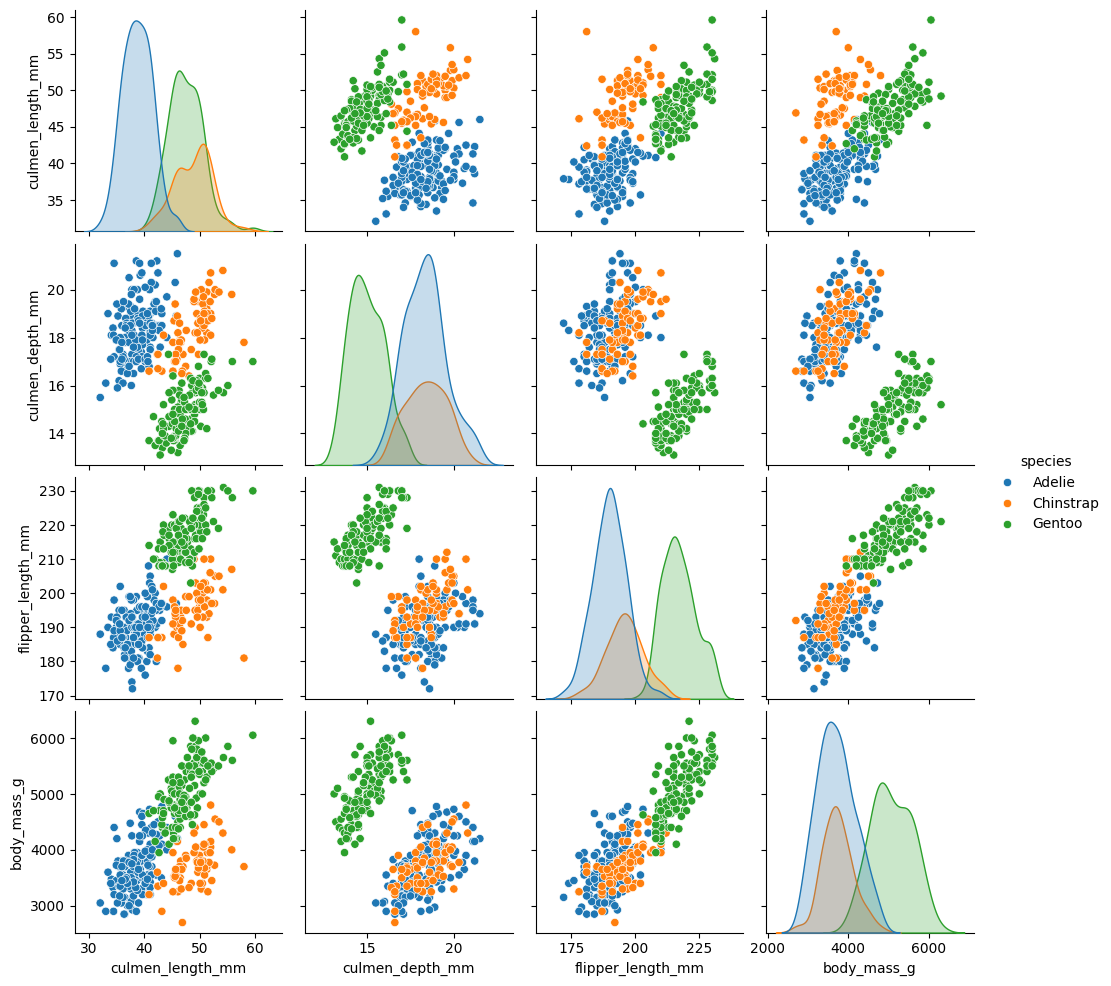

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# pairwise scatterplot colored by species
sns.pairplot(df, hue="species")
plt.show()

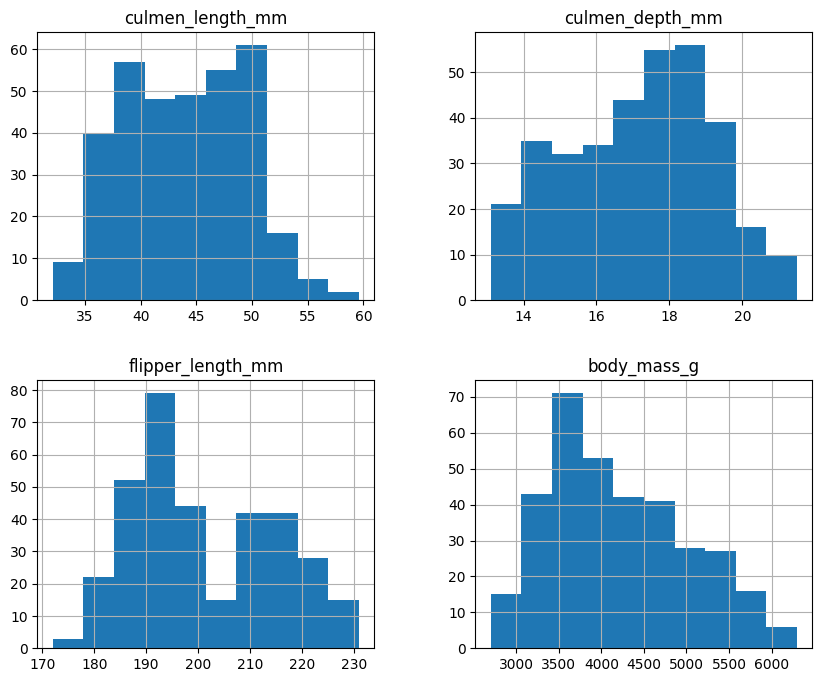

In [9]:
df.hist(figsize=(10,8))
plt.show()


In [13]:
# preprocessing steps
df_clean = df.dropna().copy()
df_clean["sex"] = df_clean["sex"].map({"Male":1, "Female":0})
df_clean = pd.get_dummies(df_clean, columns=["island"], drop_first=True)

# THIS line causes the DataFrame to display
df_clean.head()


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,NaN,False,True
1,Adelie,39.5,17.4,186.0,3800.0,NaN,False,True
2,Adelie,40.3,18.0,195.0,3250.0,NaN,False,True
4,Adelie,36.7,19.3,193.0,3450.0,NaN,False,True
5,Adelie,39.3,20.6,190.0,3650.0,NaN,False,True


In [14]:
from IPython.display import display

# after transformations
print(df_clean.shape)       # prints (rows, columns)
print(df_clean.columns)     # prints column names

display(df_clean.head())    # renders the first five rows as a table



(334, 8)
Index(['species', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'island_Dream', 'island_Torgersen'],
      dtype='object')


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,NaN,False,True
1,Adelie,39.5,17.4,186.0,3800.0,NaN,False,True
2,Adelie,40.3,18.0,195.0,3250.0,NaN,False,True
4,Adelie,36.7,19.3,193.0,3450.0,NaN,False,True
5,Adelie,39.3,20.6,190.0,3650.0,NaN,False,True


In [15]:
from sklearn.model_selection import train_test_split

X = df_clean.drop("species", axis=1)
y = df_clean["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (267, 7)
Test set size: (67, 7)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained
Decision Tree trained

--- Logistic Regression ---
Accuracy: 0.9850746268656716
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



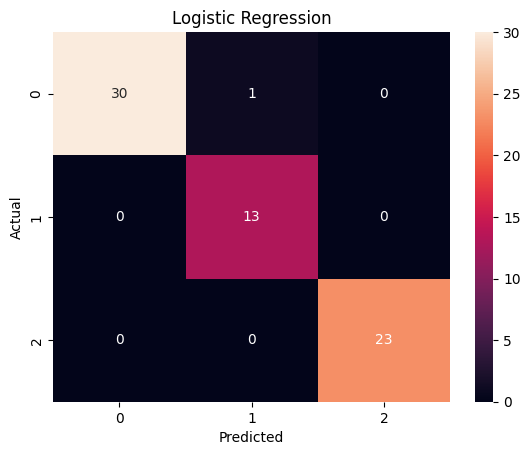


--- Decision Tree ---
Accuracy: 0.9850746268656716
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



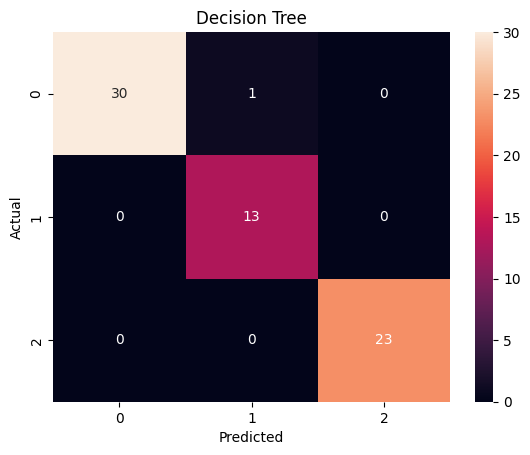

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load raw data
df = pd.read_csv("penguins_size.csv")

# 2. Drop rows with any original missing values
df = df.dropna().copy()

# 3. Encode 'sex' (all rows now have non-null sex)
#    Mapping may introduce NaNs if keys don't match, so we'll drop them again
df["sex"] = df["sex"].str.upper().map({"MALE": 1, "FEMALE": 0})

# 4. Drop any rows where mapping failed (i.e., sex is now NaN)
df = df.dropna().copy()

# 5. One-hot encode 'island'
df = pd.get_dummies(df, columns=["island"], drop_first=True)

# 6. Final sanity check: zero missing values
assert df.isnull().sum().sum() == 0, "Still found missing values!"

# 7. Split into features and target
X = df.drop("species", axis=1)
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Define and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree":       DecisionTreeClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained")

# 9. Evaluate and visualize
for name, model in models.items():
    preds = model.predict(X_test)
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [18]:
# After df_clean = df.dropna().copy() and your encodings:
print(df_clean.isnull().sum())


species                0
culmen_length_mm       0
culmen_depth_mm        0
flipper_length_mm      0
body_mass_g            0
sex                  334
island_Dream           0
island_Torgersen       0
dtype: int64


In [22]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

results = []
for name, model in models.items():
    preds = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, average="macro"),
        "Recall": recall_score(y_test, preds, average="macro"),
        "F1-Score": f1_score(y_test, preds, average="macro")
    })

print(pd.DataFrame(results))


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.985075    0.97619  0.989247   0.98219
1        Decision Tree  0.985075    0.97619  0.989247   0.98219


In [23]:
importances = models["Decision Tree"].feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_imp)


flipper_length_mm    0.514719
culmen_length_mm     0.361274
culmen_depth_mm      0.084545
island_Dream         0.033589
body_mass_g          0.005873
sex                  0.000000
island_Torgersen     0.000000
dtype: float64


In [24]:
coefs = abs(models["Logistic Regression"].coef_[0])
coef_imp = pd.Series(coefs, index=X.columns).sort_values(ascending=False)
print(coef_imp)


culmen_depth_mm      1.492962
culmen_length_mm     0.962539
island_Dream         0.437889
island_Torgersen     0.376699
sex                  0.197443
flipper_length_mm    0.077294
body_mass_g          0.000504
dtype: float64


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  "max_depth": [None, 2, 4, 6],
  "min_samples_split": [2, 5, 10],
  "min_samples_leaf": [1, 2, 4]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best_tree = grid.best_estimator_


Best params: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("RF accuracy:", rf.score(X_test, y_test))


RF accuracy: 1.0


In [28]:
def predict_penguin(sample_dict):
    row = pd.DataFrame([sample_dict])
    # apply same encoding
    row["sex"] = row["sex"].str.upper().map({"MALE":1, "FEMALE":0})
    row = pd.get_dummies(row, columns=["island"], drop_first=True)
    # ensure same columns
    for col in X.columns:
        if col not in row:
            row[col] = 0
    row = row[X.columns]
    return best_tree.predict(row)[0]

print(predict_penguin({
  "culmen_length_mm": 50,
  "culmen_depth_mm": 15,
  "flipper_length_mm": 220,
  "body_mass_g": 6300,
  "sex": "MALE",
  "island": "Torgersen"
}))


Gentoo
